# Quasi Monte Carlo Integration

## Motivation

In the above example of Monte Carlo integration, we use random sampling for a Uniform(0,1) distribution. Is this the most *efficient* approach to calculate the sample mean? Here, by *efficient* we meant using fewer draws (smaller $n$) to estimate the population mean with good accuracy and small variance. It turns out that the uniform random sampling is easy but inefficient. It has at least two short-comings.

- The function $f(x)$ or $g(t)$ most likely does not have a uniform profile. Instead, the volume of the integrand is likely to concentrate in one or a few regions in the domain. A uniform sampling would draw the same amount of samples from important regions as well as in regions where they contribute almost nothing to the integral, which is inefficient. (Example: In the homework, the regions less than 0.1 or larger than 0.9 have essentially zero volume for $f(t)$.) A more efficient algorithm should draw more samples from important regions and less from unimportant regions. This is the idea behinds the _**importance sampling**_. 
    - "*If we draw more from a particular region and less from others, does it bias the mean estimate?*" No, it doesn't. The sampling probability would account for that. 


- Even if we decide to uniformly scan through the $(0,1)$ domain without concentrating on a particular region, we could use better strategies to have samples quickly and evenly covering the region. Put in another way: The uniform sampling relies on large number to ensure evenness, but there are ways to achieve evenness without drawing as many samples. One of the strategies, which is particularly advantageous in low dimensional integrations, is to use the low discrepancy sequences in sampling. This approach is called the _**quasi-Monte Carlo integration**_. A topic we now turn to.

As we mentioned, Monte Carlo sampling while easy to do is inefficient. The inefficiency means that we need to use a lot more draws (hence more computational time) to have the sample average converging to the population mean and have small sample variance.

It turns out that, *at least for low dimensional integrations*, there are more efficient ways to compute the integration. For instance, since the goal of the Monte Carlo integration is to sample the domain densely and evenly, we do not have to rely on the randomness of a uniform distribution. In fact, simply taking numbers from an evenly spaced grid on $[0,1]$ would be more efficient. The other popular approach is to use numbers from _**low discrepancy sequences**_ (LDS). As the name suggests, numbers in the sequence are relatively (though not exactly) evenly spaced from each other (*low discrepancy*) which is a property *similar* to the grid method. However, compared to the grid method, the LDS has some added properties that makes it more powerful and practical in applications. 

Because the LDS is often referred to as quasi-random numbers (more on this below), the integration method that based on the LDS is called _**quasi-Monte Carlo integration**_.

## Low Discrepancy Sequences (LDS)

Low discrepancy sequences are also referred to as quasi-random numbers. (Recall that the random numbers we normally use are called *pseudo*-random numbers.) However, the term is misleading because, as you will see, there is nothing random about the LDS. In fact, LDS is a deterministic sequence of numbers.

The mathematic definition of discrepancy is quite specific and involved. Intuitively, discrepancy measures the deviation from uniformity of a sequence of points in $D=[0,1]^s$ where $s$ is the number of dimensions. A low discrepancy sequence would have points where the distances between them are relatively similar (*low discrepancy* or *equidistant*). There are no points clustering together. As a result, a LDS would cover the unit cube as evenly as possible by reducing gaps and avoiding clustering. Another way to put it is that if $X$ has the property of low discrepancy, a subset of the domain/design space/sample area should contain a fraction of points proportional to the subset's volume. It fills the subset "efficiently".



The LDS is not random by design; it is generated from equations and formulas. (Well, even the pseudo-random numbers are also generated algorithmically, but you know what I meant.) We can use the sequence to approximate the integral by a discrete average, which is similar to the Monte Carlo method. We introduce the popular Halton sequence below. 

## The Halton Sequence

The LDS is often used in multi-dimensional spaces. Here for illustration purposes we use the one-dimensional case as an example. The Halton sequence is constructed using prime numbers as the base. For example, if we choose `2` as the base, the sequence is constructed by diving the interval $(0,1)$ in $2^1$, then in $2^2$, $2^3$, ..., etc.. So the first few points would be generated from the following sets:
- $\{1/2\}$,
- $\{1/4, 2/4, 3/4\}$,
- $\{1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8 \}$.

Taking the union of the numbers, we have the first 7 (or, $2^3-1$) base-2 Halton points as 
- $\{1/2, 1/4, 3/4, 1/8, 3/8, 5/8, 7/8 \}$. 

We could increase the length of the sequence by adding the list of $\{1/(2^4), 2/(2^4), \ldots, \}$, and the total number of points would be $2^4-1$.

Similarly, the first few points of the base-3 Halton sequence consist of
- $\{1/3, 2/3\}$, 
- $\{1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9\}$, 
- $\{1/27, \ldots, 26/27\}$. 

Taking the union of the numbers, we have a total of 26 (or, $3^3-1$) base-3 Halton points as 
  - $\{1/3, 2/3, 1/9, 2/9, 4/9, 5/9, 7/9, 8/9, 1/27, 2/27, 4/27, 5/27, 7/27, 8/27, 10/27, 11/27, 13/27, 14/27, 16/27, 17/27, 19/27, 20/27, 22/27, 23/27, 25/27, 26/27 \}.$ 

We could increase the length of the sequence by adding the list of $\{1/(3^4), 2/(3^4), \ldots, \}$, and the total number of points would be $3^4-1$.

>> With computer packages, the generated Halton points may not have the same order as those listed above. For instance, a computer program would produce the first 7 points of the base-2 Halton sequence to be $\{1/2, 1/4, 3/4, 1/8, \mathbf{5/8}, \mathbf{3/8}, 7/8 \}$. Note that two of the points are ordered differently. The difference is because our taking-unions-of-subsets approach is not an efficient way to generate the points (while very intuitive in understanding the logic), and efficient computer algorithms would produce points that are ordered differently. 


_**Why using different primes? Why not use the base-2 sequence for everything?**_ We need to use different primes as the base numbers when we need to generate multiple sequences for a multi-dimensional (D>1) integration problem. For instance, if the integration problem has two dimensions, we could use the prime number of `2` and `3` to generate base-2 and base-3 sequences, one for each of the dimension. If the number of dimensions is three, then we could use prime numbers `2`, `3`, and `5` to generate three sequences. We don't use the same, single sequence for multi-dimensional problems, because it leads to perfect correlations between the sequences in the dimensions, and as a result the space will not be evenly filled. We'll see a graph demo later. In fact, to fill the space evenly, we need the sequences to be as uncorrelated to each other as possible. That's also the reason why we use the *primes* as the base numbers: Primes minimize overlapping.
> Note that when the number of dimensions is large, it's likely we are going to use a large prime number. The large prime number has some undesirable properties, as we'll see very soon.

It is interesting to observe the "gap filling" property of the Halton sequence. To see this, note that for the base-2 sequence, the first set of point is $1/2$ which divides the $(0,1)$ line in half with equal lengths, and the second set contains points of $1/4$ and $3/4$ which fills the "gaps" in $(0,1/2)$ and $(1/2, 1)$ and creates four equal-length segments. Similarly, the third set of points would fill each of the gaps created by the previous points. In other words, the gaps are *sequentially* filled in a way that leads to a set of points densely and evenly distributed in $(0,1)$.

Other LDSs (e.g., the Sobol sequence and its variants) also have the gap filling property, although they work in different ways.

The gap-filling behavior has implications on Halton sequences. What we are going to discuss below may be summarized by saying that the (Halton and Sobol) sequences have good uniformity of the low-order (low-dimensional) projections and/or of the earlier dimension projections. In layman's words: Those sequences are good if you use smaller primes (low-dimensional) and use the earlier parts of the sequence. Here is the explanation. See also Wang and Sloan (2003).

- **Halton Sequences using Large Prime Numbers Are Not Good:** In general, we do not like to use large primes to generate Halton sequences, particularly when the desired length of the sequence is not large. Take for example the case of using `47` as the prime. The first set of the points uses $47^1$ as the divisor and it contains a large amount of points (to be exact, 46 of them: $1/47$, $2/47$, ... $46/47$) before it completes the cycle. Only then, when it moves to the second set with the divisor $47^2$, the gap-filling action begins to take place. In comparison, the base-2 sequence has the gap-filling action started early in the sequence. Therefore, if our desired length of the Halton sequence is 25, the base-47 sequence would have points $\{1/47, 2/47, \ldots, 25/47 \}$ which cover only about the first half of the $(0,1)$ line while the base-2 sequence would have much even coverage on $(0,1)$.


- **Latter Segments of Long Halton Sequences Are Not Good:** That is, even if you use `2` as the prime, the Halton would use $2^2$, $2^3$, $\ldots$, $2^n$ as the divisor sequentially for long sequences. If $n$ is large, then exactly the same problem we discussed above would arise.

In [1]:
# Show the gap filling property. For large prime (47), the property does not work well.

using Interact, HaltonSequences, Plots

totallength = 1000
picklength  = 30

@manipulate for prime = (2,3,5,7,11,13,47), thebeg = 1:10:totallength-picklength+1, theend = 2:totallength

    allseq = Halton(prime, length=totallength)
    
    xvar = allseq[thebeg:theend]
    yvar = ones(length(xvar))
    plot(xvar, yvar, seriestype = :scatter, xlim = [0, 1], ylim=[0.5, 1.2], size=(800, 300),
         markersize=4, label="prime=$(prime), length: $(thebeg) to $(theend)")
    lens!([0.90, 1.0], [0.9, 1.1],  inset = (1, bbox(0.1, 0.2, 0.7, 0.2, :bottom, :left)),
    subplot=2, framestyle=:box, lw=4, ls=:dot, lc=:orange)
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["prime"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable(OrderedDict[OrderedDict{String, Any}("key" => "2", "val" => 1, "id" => "id9WMA1bBi"), OrderedDict{String, Any}("key" => "3", "val" => 2, "id" => "idETScs50M"), OrderedDict{String, Any}("key" => "5", "val" => 3, "id" => "idG5XVIUe8"), OrderedDict{String, Any}("key" => "7", "val" => 4, "id" => "idgJvf2eUk"), OrderedDict{String, Any}("key" => "11", "val" => 5, "id" => "idUIMweLS4"), OrderedDict{String, Any}("key" => "13", "val" => 6, "id" => "idMEXF8rgt"), OrderedDict{String, Any}("key" => "47", "val" => 7, "id" => "idIaeYEg0c")]), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mymis\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mymis\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mymis\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mymis\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mymis\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00000152f47b68c0, Task (runnable) @0x00000152f47b68c0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 1454835964528, 1454835975760)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n    

In [2]:
# Show that larger primes have poor uniformity.
# Show that even for small primes, the latter segments (e.g., last 30) have poor uniformity.

using HaltonSequences
picklength = 30
totallength= 10000

@manipulate for prime = (2,3,5,7,11,13,47), thebeg = 1:10:totallength-picklength+1    

    allseq = Halton(prime, length=totallength)  
    theend = thebeg + picklength - 1
    
    xvar = allseq[thebeg:theend] 
    yvar = ones(picklength)
    
    plot(xvar, yvar, seriestype = :scatter, xlim = [0, 1], ylim=[0, 2], size=(700, 200),
         markersize=3, label="prime=$(prime), length: $(thebeg) to $(theend)")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["prime"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable(OrderedDict[OrderedDict{String, Any}("key" => "2", "val" => 1, "id" => "id2D0H6oNc"), OrderedDict{String, Any}("key" => "3", "val" => 2, "id" => "idWCxMo5nP"), OrderedDict{String, Any}("key" => "5", "val" => 3, "id" => "idgjrGY5IH"), OrderedDict{String, Any}("key" => "7", "val" => 4, "id" => "idWIMPmA7e"), OrderedDict{String, Any}("key" => "11", "val" => 5, "id" => "idtSB8gNdq"), OrderedDict{String, Any}("key" => "13", "val" => 6, "id" => "idSt09fjs1"), OrderedDict{String, Any}("key" => "47", "val" => 7, "id" => "idgZUlcU2W")]), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mymis\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mymis\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mymis\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mymis\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mymis\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00000152becddd20, Task (runnable) @0x00000152becddd20), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 412685649598)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                i

A few finer points (pun intended) here:
- To have a more or less *complete* set of points that would cover the $(0,1)$ evenly, we should, theoretically, choose the length of the sequence equal to $b^n-1$ where $b$ is the base number. For instance, if we choose $b=2$ to construct the sequence, we could choose the length equal to $2^3-1=7$, so that the points would cover $(0,1)$ more evenly. You may see what would happen if we choose the length of 5: we miss $5/8$ and $7/8$. Very few articles talked about this, and the reasons may be (1) If the length is large such as in the hundreds, this detail might not be as important. (2) In the case of multi-dimensionality, it is impossible to have complete sets on all the dimensions; we'll see why very soon. 


- The order of the numbers appearing in the sequence may or may not be important. That is, we are talking about, for instance, $\{1/4, 2/4, 3/4\}$ vs. $\{1/4, 3/4, 2/4\}$. If we observe the $b^n-1$ rule and always construct a complete sequence, then the order does not matter for the one-dimensional case. It is because no matter how you arrange the numbers, they'll all show up in the set. However, if the $b^n-1$ rule is not followed and we always pick up an arbitrary length of the sequence, then we might want to order the number in a symmetric way. For instance, we may want to order the numbers as in $\{1/9, 8/9, 2/9, 7/9, 3/9, 6/9, 4/9, 5/9 \}$. This way, we avoid having more points toward one end of the sequence when it is truncated. In fact, some of the computer routines would produce the sequence this way.

The gap-filling property also contributes to another desired property of the LDS: the additivity (need to check the terminology). That is, given a LDS of length $n$, any subset of the sequence of length $m\leq n$ would itself be a LDS. Or, given a length-$n$ LDS, adding another $m$ points to the original sequence would still be a LDS. 

In practice, the LDS's additivity is an important characteristic that tells it apart from the grid-method based sequences. It is best illustrated using an example. Consider a grid sequence "A" and a Halton base-2 sequence "B"; both are of length 7:
- A = $\{1/8, 2/8, 3/8, 4/8, 5/8, 6/8, 7/8\}$,
- B = $\{ 1/2, 1/4, 3/4, 1/8, 5/8, 3/8, 7/8 \}$.

If we take a subset from both of them with length=3, we have
- A1 = $\{1/8, 2/8, 3/8\}$,
- B1 = $\{ 1/2, 1/4, 3/4\}$.

Clearly, B1 is more evenly spaced in $(0,1)$ than A1 is.

This property has an important advantage in practice: Suppose we drew $n$ points from the sequences to approximate an integration, only realized later that $n$ is not enough and we need to use $p$ $(>n)$ points. For the grid-based method, we need to re-calculate the grid and re-evaluate all of the $p$ points on the function. For the LDS, we could keep all the existing $n$ points and only evaluate the additional $p-n$ points. This could be helpful in speed-critical missions.

An even more important property of the LDS, however, is when it is applied to multi-dimensional problems. A topic we now turn to.

A multi-dimensional Halton sequence is one that pairs the points from different-base-number generated sequences. For instance, if we construct a two-dimensional Halton sequence using base number $2$ and $3$, we could have: $\{(1/2, 1/3), (1/4, 2/3), (3/4, 1/9), (1/8, 4/9), (5/8, 7/9), (3/8, 2/9), (7/8, 5/9)\}$. Note that I have re-arranged the sequences to make them more or less *symmetric* before doing the pairing. 

In the case of multi-dimensional, people usually draw Halton sequences with sequential prime numbers. That is, use primes (2,3) for 2-D, (2,3,5) for 3-D, (2,3,5,7) for 4-D, etc.. Though it does not have to be this way. It's perfectly fine to use (2,5) for 2-D, for example.

The multi-dimensional Halton sequence has a well-know problem, which is that the first few points from different prime-based sequences tend to correlated with each other. The problem is particularly salient for higher dimensional sequences. For instance, the first few points from base-7 and base-11 sequences are very obvious. (We'll use a graph to demonstrate the problem.) We do not like the correlation in the LDS, because it introduces unwanted correlations to the objective functions (e.g., Mary's and John's likelihood of taking bus to school today). Avoiding correlation is also the reason that we use prime numbers to construct the Halton sequence to begin with. If they are not primes, two Halton sequences will overlap at a predictable frequency.


There are some ways to reduce the problems associated with the high-dimensional Halton sequences, but they are far from satisfactory:
- Cut off the first few points. It is because the correlation tends to be particularly strong in the first few points.
- Jump the primes. For instance, sequences from primes (2,11) would be fine (though sequences from primes (7,11) is problematic).
  - However, this approach has a limit, because if we continue to skip primes we'll quickly find ourselves using large primes (e.g., 47). But Halton sequence with large primes is itself problematic, as we have discussed earlier. 
  
  
To deal with the problem of correlations between Halton sequences in high-dimensional cases, a better solution is to randomize (in some sense) the sequences. In the literature, it is called generalized Halton or scrambled Halton sequences. Details of which shall be left to advanced courses.

Julia provides packages to produce Halton sequence.

In [3]:
using HaltonSequences
Halton(2, length=7) |> display       # base=2, length=7
HaltonPoint(2, length=7) |> display  # dimension=2, length=7; base is the the default (2,3)

7-element Halton{Float64}:
 0.5
 0.25
 0.75
 0.125
 0.625
 0.375
 0.875

7-element HaltonPoint{Float64}:
 [0.5, 0.3333333333333333]
 [0.25, 0.6666666666666666]
 [0.75, 0.1111111111111111]
 [0.125, 0.4444444444444444]
 [0.625, 0.7777777777777777]
 [0.375, 0.2222222222222222]
 [0.875, 0.5555555555555556]

The following graph shows how a 2-D Halton sequence fills the space.

<div>
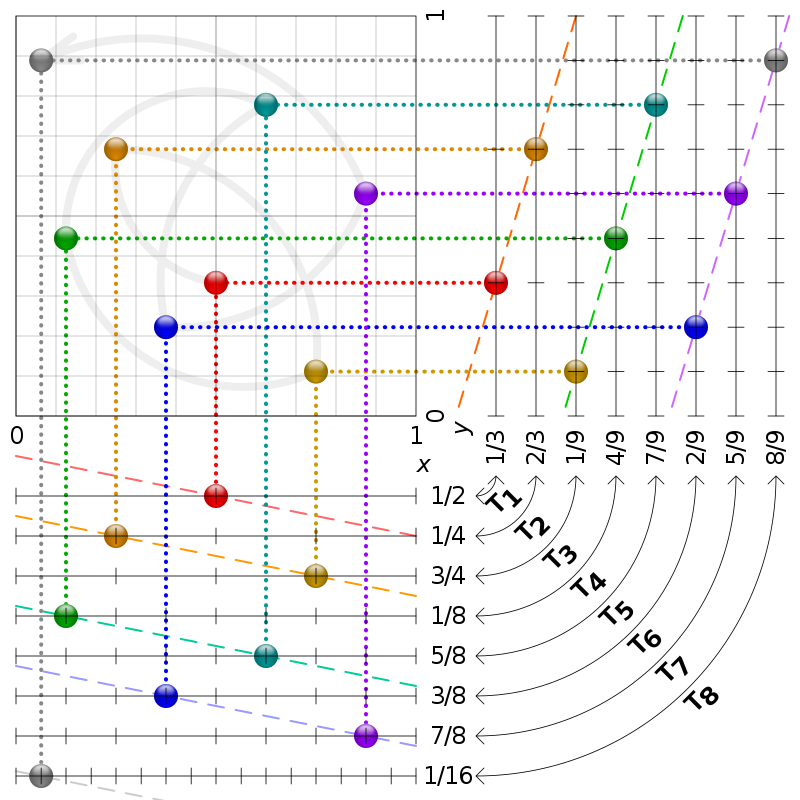
(source: wikipage)
</div>




Let's see the 3-D case.

In [4]:
# change `mybegin` to show that any subset is equdistant

@manipulate for mylength=1:2000, angle1=45:90, angle2=45:90, mybegin=1:500
    x1 = Halton(2, length=mylength)[mybegin:end]
    y1 = Halton(3, length=mylength)[mybegin:end]
    z1 = Halton(5, length=mylength)[mybegin:end]
    # gh1 = plot(x1, y1, z1, seriestype=:scatter, markersize=4, camera=(angle1, angle2))
    scatter(x1, y1, z1, markersize=4, camera=(angle1, angle2))
end    

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["mylength"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 2000, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(1000), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mymis\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mymis\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mymis\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mymis\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mymis\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001528416c010, Task (runnable) @0x000001528416c010), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 1454836006576, 1454836008592)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",

In [5]:
# Does Halton sequence really produce a more evenly spaced sampling point?
# Also show that the first few Halton points may be correlated, so need to get rid of some.

# show the correlation from prime1=7,prime2=11 
# show the correlation reduced by prime1=2,prime2=11
# show odd behavior if prime2=47
# show better performance of generalzied Halton

using Random, Plots, RCall

prime1, prime2 = 2, 11   # (2,3) looks ok, (7,11) looks bad, (2,11) looks ok. Lesson: for high dimensions, not good, even if cutting off the first few obs there is still strong corr
mylength = 500
    
Random.seed!(1234)  
   # random; pre-generate long sequences
a1 = rand(500)
b1 = rand(500)      

   # Halton
a2 = Halton(prime1, length=500)
b2 = Halton(prime2, length=500)

   # generalized Halton
reval("suppressMessages(suppressWarnings(library(qrng)))")  # load `qrng` package in R
ab3 = rcopy(R"set.seed(271); ghalton(n=$(mylength), d=5, method=c(\"generalized\") )")[:,4:5]  # get dim=5 and keep only dim=4,5


@manipulate for mybeg=1:mylength, myend=2:mylength    # choose the length of the sequence
    ph1 = scatter(a1[mybeg:myend], b1[mybeg:myend], label="Random")
    ph2 = scatter(a2[mybeg:myend], b2[mybeg:myend], label="Halton")    
    ph3 = scatter(ab3[mybeg:myend, 1], ab3[mybeg:myend, 2], label="gHalton" )
    plot(ph1, ph2, ph3)
end    


## Homework: Instead of using `rand`, use grids instead. Try your best to have a "nice" coverage.


[ Info: Precompiling RCall [6f49c342-dc21-5d91-9882-a32aef131414]
[ Info: No R installation found by RCall.jl. Precompilation of RCall and all dependent packages postponed. Importing RCall will fail until an R installation is configured beforehand.
[ Info: Skipping precompilation since __precompile__(false). Importing RCall [6f49c342-dc21-5d91-9882-a32aef131414].
[ Info: No R installation found by RCall.jl. Precompilation of RCall and all dependent packages postponed. Importing RCall will fail until an R installation is configured beforehand.


LoadError: LoadError: InitError: No R installation was detected at RCall installation time. Please provided the location of R by setting the Rhome and libR preferences or else set R_HOME='*' and rerun Pkg.build("RCall") to use Conda.jl.
during initialization of module RCall
in expression starting at C:\Users\mymis\.julia\packages\RCall\dDAVd\src\RCall.jl:1

##  Homework 2
###  Let's redo the integration problem using Halton sequence:
  $$\begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
  \end{aligned}$$ 
- Use Monte Carlo integration (via LDS) to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw Halton sequence from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.

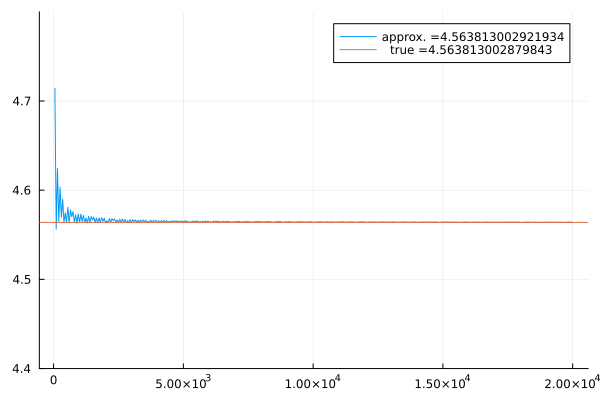

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["grid"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 400, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(200), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mymis\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mymis\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mymis\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mymis\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mymis\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001537fa1d750, Task (runnable) @0x000001537fa1d750), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"

In [9]:
# Solution to HW2

using Distributions, HaltonSequences

g(x) = exp((-1/3) * (x^2)) * sqrt(1+x^2)
x(t) = (2*t-1) / (t-t^2)                          # variable transformation
J(t) = (2*(t^2)-2*t+1) / ((t^2-t)^2)              # Jacobian
f(t) = g(x(t))*J(t)

every = 50
n_end = 20000

n_start = every
res_Halton = zeros(Int((n_end-n_start)/every) + 1)

hpt = Halton(2, length=n_end)

for n in n_start:every:n_end                   
    res = sum( f.(hpt[1:n]) ) / n
    res_Halton[Int((n-n_start)/every) + 1] = res
end


n = [n_start:every:n_end;]
plot(n, res_Halton, ylimit=[4.4, 4.8], label="approx. =$(res_Halton[end])") 
hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") |> display

allgrids = Int(n_end/every)

@manipulate for grid in 1:allgrids 
    n1   = n[1:grid]  # the max of grid is allgrids
    res1 = res_Halton[1:grid]
    plot(n1, res1, ylimit=[4.4, 4.8], label="approx. =$(res1[end])")
    hline!([4.5638130028798430179261736288958], label="  true =4.563813002879843") 
end




# Comparisons
|                  | Gauss-Quadratures                                                                                  | Adaptive Quadratue                                             | Monte Carlo                                                          | Quasi Monte Carlo                                                                                        |
|------------------|----------------------------------------------------------------------------------------------------|----------------------------------------------------------------|----------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|
| where            | hand-made                                                                                          | Julia' QuadGK                                                  | hand-made                                                            | hand-made                                                                                                |
| feature          | G-Legendre, G-Hermite, G-Laguerre                                                                  | G-Legendre + G-Kronrod                                         | random draw from [0.1]                                               | low discrepancy sequences:  Halton, Sobol, etc.                                                          |
| stochastic       | No                                                                                                 | No                                                             | Yes                                                                  | No                                                                                                       |
| convergence rate | very good for 1D problems; but  has the curse of dimensionality                                    | very good for 1D problems; but has the curse of dimensionality | $1/\sqrt{N}$                                                         | $1/N$                                                                                                    |
| availability        | 5/10. Some packages do not have  any; some provide only the GH rules  but not others (e.g., Stata) | 2/10. Quite rare.                                              | 10/10. Don't require specialized routines. You can do it with Excel. | 3/10. Some packages do not have any. Some  provide only the basic sequence such as the  Halton sequence. |

# Multi-Dimension Problems and the Curse of Dimensionality

So far we learned several numerical integration methods: the Gauss quadrature method, the Monte Carlo method, and the quasi-Monte Carlo method. Each method has its own strength, though it is generally agreed that for one-dimensional problems the quadrature-based methods have clear advantages (fast and accurate). However, for multi- and high-dimensional problems, the (quasi-)Monte Carlo methods are often the only feasible choices. We will use examples to show why this is the case. Before that, let's see how we might extend the one-dimensional quadrature rules to multi-dimensional problems.


Consider the following problem of the Gauss-Legendre type:

$$\begin{aligned}
I = \int_{0}^1 f(x,y)dx dy.
\end{aligned}$$


### the quadrature methods

To use the GL rules, we may first integrate only $y$:

$$\begin{aligned}
 \int_{0}^1 f(x,y) dy \approx \sum_{i=1}^n \omega_i f(x, \xi_i).
\end{aligned}$$

Then we integrate $x$ as well:

$$\begin{aligned}
 I=\int_{0}^1 f(x,y) dx dy \approx \sum_{j=1}^n \sum_{i=1}^n \omega_j \omega_i f(\xi_j, \xi_i).
\end{aligned}$$

The above approach is the (tensor) product rule. Note that for $i=1$, $j$ is evaluated from 1 to $n$; for $i=2$, $j$ is evaluated from 1 to $n$ again. Therefore, for the two dimensional problem, the number of evaluations is $n^2$. More generally, the number of evaluations is $n^D$ where $D$ is the number of dimensions. That is, it grows exponentially with the number of dimensions. Also, for fixed dimensions, the number of quadrature points also increases exponentially if the desired precision is increased. The issue is referred to as the *curse of dimensionality*. 

### the (quasi-)Monte Carlo methods

Given a two-dimensional arrays of an LDS $\{ (l^1_j, l^2_j), \ j=1,\ldots,S \}$, the two dimensional integration problem is evaluated as


$$\begin{aligned}
 I =\int_{0}^1 f(x,y) dx dy \approx  \sum_{j=1}^S f(l^1_j, l^2_j).
\end{aligned}$$

Note that the number of evaluation points is still $S$ despite of the number of dimensions.



## A 3-dimensional integration problem.

\begin{align}
 I = \int_0^1 \left(\frac{1}{x+1} + \sqrt{y} + 2(z)^3\right) dxdydz
\end{align} 

Clearly, `quadgk()` is not applicable here because it only handles 1-D problems. Julia has a package `HCubature.jl` which specialized in multi-dimensional integration using adaptive methods. The following piece of code shows how we may use `HCubature`, products of Gauss-Legendre rules, the quasi-Monte Carlo, and the Monte Carlo methods to calculate the integration.



In [7]:
using HCubature, HaltonSequences, Statistics, FastGaussQuadrature

f(x) = 1/(x[1]+1) + sqrt(x[2]) + 2*x[3]^2

m=30

# Quasi Monte Carlo (Halton)
n = m^3
halton_3d = HaltonPoint(3, length=n)
sol_qMC_halto = mean(f.(halton_3d)) 
@show sol_qMC_halto


# HCubature
sol_hcubature = hcubature(f, [0,0,0], [1,1,1], rtol=1e-8)[1] 
@show sol_hcubature


# Gauss Quadrature, product rule 
f2(x1,x2,x3) = 1/(x1+1) + sqrt(x2) + 2*x3^2     # for programming convinience

jacob_1 = 1/2                  # let xi = (ti+1)/2 (change damain to [-1,1])
jacob_2 = 1/2
jacob_3 = 1/2
inte(t1,t2,t3) = f2((t1+1)/2, (t2+1)/2, (t3+1)/2)*jacob_1*jacob_2*jacob_3



xi, w = gausslegendre(m)
inte_2(t2,t3) = sum(w.*inte.(xi,t2,t3))       # integrate out t1
inte_3(t3) = sum(w.*inte_2.(xi,t3))           # integrate out t2
sol_GLegendre = sum(w.*inte_3.(xi))           # integrate out t3
@show sol_GLegendre
# Ask: How many points are used in the computation? 30^3 = 27_000




# Monte Carlo
n = m^3
random_3d = rand(3, n)
random_3d = collect(eachcol(random_3d))
sol_mc_random = mean(f.(random_3d))
@show sol_mc_random

sol_qMC_halto = 2.02629256650554
sol_hcubature = 2.0264805140089472
sol_GLegendre = 2.0264841447030766
sol_mc_random = 2.027726235571523


2.027726235571523

The above results indicate that, for low-dimensional (3D) problems, the product rule of the Gauss-Legendre is still feasible and good. What if we keep going up on the dimensions? Let's consider a 5D integration problem as follows.

## A 5-dimensional integration problem

\begin{align}
 I = \int_0^1 \left(\frac{1}{x+1} + \sqrt{y} + 2(z)^3 + \sqrt{2 p} +  q^{1/3}\right) dxdydzdpdq
\end{align} 



In [8]:
using HCubature, HaltonSequences, Statistics, FastGaussQuadrature

f(x) = 1/(x[1]+1) + sqrt(x[2]) + 2*x[3]^2 + sqrt(2*x[4]) + cbrt(x[5])


# HCubature
sol_hcubature = hcubature(f, [0,0,0, 0,0], [1,1,1,1,1], rtol=1e-8)[1] 
@show sol_hcubature


# Gauss Quadrature, product rule 
f2(x1,x2,x3,x4,x5) = 1/(x1+1) + sqrt(x2) + 2*x3^2 + sqrt(2*x4) + cbrt(x5)     # for programming convinience

m=30
xi, w = gausslegendre(m)
jacob_1 = 1/2                  # let xi = (ti+1)/2 (change damain to [-1,1])
jacob_2 = jacob_3 = jacob_4 = jacob_5 = 1/2
inte(t1,t2,t3,t4,t5) = f2((t1+1)/2, (t2+1)/2, (t3+1)/2, (t4+1)/2, (t5+1)/2)*jacob_1*jacob_2*jacob_3*jacob_4*jacob_5
inte_2(t2,t3,t4,t5) = sum(w.*inte.(xi,t2,t3,t4,t5))       # integrate out t1
inte_3(t3,t4,t5)    = sum(w.*inte_2.(xi,t3,t4,t5)) 
inte_4(t4,t5)       = sum(w.*inte_3.(xi,t4,t5))          
inte_5(t5)          = sum(w.*inte_4.(xi,t5))
sol_GLegendre       = sum(w.*inte_5.(xi))                
@show sol_GLegendre
# Ask: How may points were used in the evaluation? 30^5 = 24_300_000


# Quasi Monte Carlo (Halton)
n = m^5
halton_3d = HaltonPoint(5, length=n)
sol_qMC_halto = mean(f.(halton_3d)) 
@show sol_qMC_halto


# Monte Carlo
n = m^5
random_5d = rand(5, n)
random_5d = collect(eachcol(random_5d))
sol_MC_random = mean(f.(random_5d))
@show sol_MC_random


sol_hcubature = 3.7192895557617027
sol_GLegendre = 3.719309923942772
sol_qMC_halto = 3.7192887100128935
sol_MC_random = 3.7191668937931524


3.7191668937931524

MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


MethodError: MethodError: no method matching getindex(::Int64, ::UnitRange{Int64})

[0mClosest candidates are:
[0m  getindex(::Number, [91m::Integer[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:96[24m[39m
[0m  getindex(::Number)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:95[24m[39m
[0m  getindex(::Number, [91m::Integer...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:101[24m[39m
[0m  ...


As you can see, with the same amount of random draws for various algorithms, the advantage of Gauss-Lengendre disappers when D goes up.

[//]: # "Sentences within the quotes are commented out.# Bits and Pieces

More generally, given a random variable $X$ with an arbitrary PDF $p(x)$ (such as $p(x) = 1/(b-a)$ in the previous example), then the estimator is

$$\begin{aligned}
I = \frac{1}{n}\sum_{i=1}^n \frac{f(x_i)}{p(x_i)}.
\end{aligned}$$

Let $y_i = f(x_i)/p(x_i)$, the MC estimate becomes

$$\begin{align}
I = \frac{1}{n}\sum_{i=1}^n y_i.
\end{align}$$

It is important to choose a suitable $p(x_i)$ so that $f(x_i)/p(x_i)$ results in a low sampling variance. It makes a more smooth convergence path and avoids chatters. Hence, it is necessary to be able to draw samples from the chosen PDF.
- inversion
  - compute CDF P(x)
  - compute $P^{-1}(x)$
  - obtain $\xi$
  - compute $X_i = P^{-1}(\xi)$
  - example: exponential distribution; $p(x) = a e^{-ax}$  
$$\begin{align}
\mathrm{CDF\ P(x)\ } = \int_0^x ae^{-as}ds = 1-e^{-ax},\\
P^{-1}(x) = -\frac{1}{a}\ln(1-x),\\
\mathrm{obtain\ } \xi_i,\\
X_i = P^{-1}(\xi) = -\frac{1}{a}\ln(1-\xi) = -\frac{1}{a}\ln \xi
\end{align}$$  
- rejection
- transform"

# Some Remarks


## On Convergence Rates

- It can be shown that the expected error of the Monte Carlo integrator is $\sigma(g)/\sqrt{n}$ where $\sigma^2(g)$ denotes the variance of $g(\cdot)$ function. So, the error is proportional to $1/\sqrt{n}$ which is the MC method's convergence rate. Therefore, if we want to reduce the error by half, we need to quadruple the number of random draws. Or, if you to gain an extra decimal of accuracy, you will need 100 times more points! It is very slow.


- The rate of convergence using the LDS is $1/n$, so it may be superior to the Monte Carlo methods. However, some research finds that this advantage decreases with increasing dimensions. 


- We as practitioners often care about the converge rate of the various estimators: how quickly the estimate converges to the true value. If an estimator has a quick converge rate, small $n$ should suffice which reduces the computational burden.


- Quadrature methods have very good convergence rate for one-dimensional problems. However, the convergence rate deteriorates quickly as we move to higher dimension problems. This is called the *curse of dimensionality*.


- The Monte Carlo method is different. Although it does not converge as quickly in one-dimensional problems, the convergence rate is independent of the number of dimensions in the integral. Therefore, it does not suffer from the curse of dimensionality, and this property makes the Monte Carlo method attractive for multi- and high-dimensional problems.

## On High Dimension Integration

- `(Benz Bretz 2009) Computation of Multivariate Normal and t Probabilities.pdf`

- Some use `quadrature` for 1-D numerical integration and `cubature` for multi-D numerical integration. Some would use `quadrature` to mean all of the numerical integration. In some places, `cubature` may include MC methods and non-MC methods such as the Genz-Malik algorithm.

- The naive Monte Carlo method is easy to implement and may work well for simple problems. However, the Monte Carlo method could really shine (particular in high dimensions) when it is customized to use problem-specific sampling distributions. It is because many if not most of high-dimensional integrands are very localized and small subspace would contribute the most to the integral. Many of the Monte Carlo methods are devoted to developing strategies to do smart sampling.


- (from Wikipage "VEGAS algorithm") The VEGAS algorithm, due to G. Peter Lepage, is a method for reducing error in Monte Carlo simulations by using a known or approximate probability distribution function to concentrate the search in those areas of the integrand that make the greatest contribution to the final integral. The VEGAS algorithm is based on importance sampling. It samples points from the probability distribution described by the function $|f|$, so that the points are concentrated in the regions that make the largest contribution to the integral.



The followings are from other papers:


- MCMC: Markov Chain Monte Carlo (MCMC) is a common variation on Monte Carlo integration that uses dependent random samples. In many applications, such as Bayesian statistics, you'd like to be able to create independent random samples from some probability distribution, but this is not practical. MCMC is a compromise. It produces a Markov chain of dependent samples, and asymptotically these samples have the desired distribution. The dependent nature of the samples makes it difficult to estimate error and to determine how well the integration estimates using the Markov chain have converged.

[//]: # "(Weinzierl) Introduction to Monte Carlo Methods.pdf"


# Julia Resources

- `quadGK.jl`: One-dimensional integration using the method of adaptive quadratures based on the Gauss-Kronrod rule. Pure Julia implementation. All bounds accepted (transform bounds automatically).


- `HCubature.jl`: One- and Multi-dimensional integration. The 1D integration is done by calling `quadGD.jl` and the multi-D integration is done (mainly) using the h-adaptive integration which in turn uses the Genz-Malik rule. Pure Julia implementation. Accept finite bounds (not sure about infinity).
    - See also `Cubature.jl` which provides similar functionality of `HCubature` but not a Julia implementation. It has better explanation regarding algorithms.
    - Some say that for dimensions smaller than 7, `HCubature` works well. For higher dimensions, may need to use Monte Carlo methods.


- `Cuba.jl`: One- and Multi-dimensional integration; providing various Monte Carlo methods (vegas, suave, divonne) and one deterministic cubature-based method (cuhre). A wrapper around the C `Cuba` library. Bounds need to be in $[0,1]$.
- The Cuba library says that `cuhre` uses the cubature rule, which it said is deterministic and is different from MC. But what is cubature rule?


- `Integrals.jl`: A package that integrates most of the other packages into one unified interface.



# Other Resources

#### High-dimensional integration using Julia: `HCubature.jl`
- https://docs.juliahub.com/CalculusWithJulia/AZHbv/0.0.5/integral_vector_calculus/double_triple_integrals.html
- The computationally efficient way to perform multiple integrals numerically would be to use hcubature. However, this function is defined only for rectangular regions. In the event of non-rectangular regions, the suggested performant way would be to find a suitable transformation.
- However, for simple problems, where ease of expressing a region is preferred to computational efficiency, the following function, fubini, can be used. 
- The fubini function is defined in terms of iterated uses of the quadgk function, previously used for one-dimensional integrals. The function allows the endpoints to be expressed through a numeric constant or a function of the previous variables. That is, the end points could be a function of the variable to be integrated.
- https://discourse.julialang.org/t/2d-integration-over-non-rectangular-domain-using-cubature/2991/11


- https://web.northeastern.edu/afeiguin/phys5870/phys5870/node73.html

- https://astrostatistics.psu.edu/su14/lectures/cisewski_is.pdf

- https://artowen.su.domains/mc/Ch-var-is.pdf
